## **Unsupervised learning model: Kmeans Clustering**

Benhur Tedros

In [1]:
# Importing the required libraries

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import os

In [2]:
# Setting up the path directory
os.chdir('F:\\BENHUR FOLDER\\Data Science Career Track\\Capstone Project')
os.getcwd()

'F:\\BENHUR FOLDER\\Data Science Career Track\\Capstone Project'

In [3]:
# Loading the csv datafile into pandas dataframes
data = pd.read_csv('Dialysis_Mortality.csv')

# Getting information on the data fields, attributes,data types,field names
data.shape

(6810, 98)

In [4]:
# Subsetting the features needed for the prediction
# feature_select = pd.DataFrame(data.iloc[:,[0,1,2,4,9,11,13,14,16,17,18,19,20,25,27,29,32,33,36,38,39,40,41,42,43,44,46,48,
#                                            49,51,52,53,54,55,57,58,59,60,61,71,72,73,74,77,80,84,85,86,87,91,94]])
feature_select= pd.DataFrame(data.iloc[:,[1,2,4,9,11,13,14,16,17,18,19,20,25,27,33,44,46,53,57,58,59,60,61,
                                           74,77,80,87,91,94]])
feature_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 29 columns):
Network                                                                                    6810 non-null int64
Facility Name                                                                              6810 non-null object
Five Star                                                                                  6017 non-null float64
State                                                                                      6810 non-null object
County                                                                                     6810 non-null object
Profit or Non-Profit                                                                       6810 non-null object
Chain Owned                                                                                6810 non-null bool
Late Shift                                                                                 6810 non-null bool
#

In [5]:
# Rename some of the features for convenience
features_all = feature_select.rename(columns = {'Facility Name':'facility_name','Profit or Non-Profit':'Profit_YesNo','Five Star':'five_star','# of Dialysis Stations':'Dial_Stations','Offers in-center hemodialysis':'hemodial_incenter',
                                      'Offers in-center peritoneal dialysis':'perit_incenter','Offers home hemodialysis training':'hemoTrain_home','Chain Owned':'chain_owned','Late Shift':'late_shift',
                                      'Percentage of Medicare patients with Hgb<10 g/dL':'Medicare_Patient_Hgb<10','Percentage of Medicare patients with Hgb>12 g/dL':
                                      'Medicare_Patient_Hgb>12','Percent of Adult HD patients with Kt/V >= 1.2':'HD_Patient_Kt/V >= 1.2','Percentage of Pediatric HD patients with Kt/V >= 1.2':
                                      'HD_Pediatric_Kt/V >= 1.2','Percentage of patients with arteriovenous fistulae in use':'Pat_AV_fistulae',
                                      'Percentage of patients with vascular catheter in use for 90 days or longer':'Pat_Vasc-Catheter_90days',
                                      'Percentage of Adult patients with hypercalcemia (serum calcium greater than 10.2 mg/dL)':'Pat_hypercalcemia',
                                      'Percentage of Adult patients with serum phosphorus less than 3.5 mg/dL':'SerumPhos_<3.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 3.5-4.5 mg/dL':'SerumPhos_3.5-4.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 4.6-5.5 mg/dL':'SerumPhos_4.6-5.5mg/dL',
                                      'Percentage of Adult patients with serum phosphorus between 5.6-7.0 mg/dL':'SerumPhos_5.6-7.0mg/dL',
                                      'Percentage of Adult patients with serum phosphorus greater than 7.0 mg/dL':'SerumPhos_>7.0mg/dL',
                                      'Mortality Rate (Facility)':'Mortality_rate', 'Readmission Rate (Facility)':'Readmission_rate',                                     
                                      'Hospitalization Rate (Facility)':'Hospitalization_rate',
                                      'Percentage of adult PD patients with Kt/V>=1.7':
                                      'PD_Pat_Kt/V>=1.7','Standard Infection Ratio':'Infection_ratio','Transfusion Rate (Facility)':'Transfusion_rate'})                                                 

features_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 29 columns):
Network                     6810 non-null int64
facility_name               6810 non-null object
five_star                   6017 non-null float64
State                       6810 non-null object
County                      6810 non-null object
Profit_YesNo                6810 non-null object
chain_owned                 6810 non-null bool
late_shift                  6810 non-null bool
Dial_Stations               6810 non-null int64
hemodial_incenter           6810 non-null bool
perit_incenter              6810 non-null bool
hemoTrain_home              6810 non-null bool
Medicare_Patient_Hgb<10     5952 non-null object
Medicare_Patient_Hgb>12     5952 non-null object
HD_Patient_Kt/V >= 1.2      6066 non-null object
Pat_AV_fistulae             6149 non-null object
Pat_Vasc-Catheter_90days    6149 non-null object
Pat_hypercalcemia           6412 non-null object
SerumPhos_<3.5mg/dL   

In [6]:
## regrouping the columns to line up the predictor variables together and 
# move the mortality rate(the response variable) to the last column

# To get a list of columns
cols = list(features_all)

# To move the column to last of columns' list
cols.insert(0, cols.pop(cols.index('facility_name')))


# To reorder the columns
features_all = features_all.ix[:, cols]

C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if sys.path[0] == '':


In [7]:
from sklearn.preprocessing import LabelEncoder

# To convert the categorical inputs of some data fields to numerical nature

numeric = LabelEncoder()
features_all['Profit_YesNo']=numeric.fit_transform(features_all['Profit_YesNo'].astype('str'))
features_all['chain_owned']=numeric.fit_transform(features_all['chain_owned'].astype('str'))
features_all['late_shift']=numeric.fit_transform(features_all['late_shift'].astype('str'))
features_all['hemodial_incenter']=numeric.fit_transform(features_all['hemodial_incenter'].astype('str'))
features_all['perit_incenter']=numeric.fit_transform(features_all['perit_incenter'].astype('str'))
features_all['hemoTrain_home']=numeric.fit_transform(features_all['hemoTrain_home'].astype('str'))


In [32]:
# Some of the features contain a "%" symbol, which has to be cleaned.
# Getting rid off the % symbol from the respective columns

features_all[['Medicare_Patient_Hgb<10','Medicare_Patient_Hgb>12','HD_Patient_Kt/V >= 1.2',
              'Pat_AV_fistulae','Pat_Vasc-Catheter_90days','Pat_hypercalcemia','SerumPhos_<3.5mg/dL',
              'SerumPhos_3.5-4.5mg/dL','SerumPhos_4.6-5.5mg/dL','SerumPhos_>7.0mg/dL']] \
= features_all[['Medicare_Patient_Hgb<10','Medicare_Patient_Hgb>12','HD_Patient_Kt/V >= 1.2',
                'Pat_AV_fistulae','Pat_Vasc-Catheter_90days','Pat_hypercalcemia','SerumPhos_<3.5mg/dL',
              'SerumPhos_3.5-4.5mg/dL','SerumPhos_4.6-5.5mg/dL','SerumPhos_>7.0mg/dL']]\
              .replace('%','',regex=True).astype('float')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 29 columns):
facility_name               6810 non-null object
Network                     6810 non-null int64
five_star                   6017 non-null float64
State                       6810 non-null object
County                      6810 non-null object
Profit_YesNo                6810 non-null int64
chain_owned                 6810 non-null int64
late_shift                  6810 non-null int64
Dial_Stations               6810 non-null int64
hemodial_incenter           6810 non-null int64
perit_incenter              6810 non-null int64
hemoTrain_home              6810 non-null int64
Medicare_Patient_Hgb<10     5952 non-null float64
Medicare_Patient_Hgb>12     5952 non-null float64
HD_Patient_Kt/V >= 1.2      6066 non-null float64
Pat_AV_fistulae             6149 non-null float64
Pat_Vasc-Catheter_90days    6149 non-null float64
Pat_hypercalcemia           6412 non-null float64
SerumPhos_<3

In [9]:
#Loading county based population dataset

pop_county= pd.read_csv('Population_county.csv',encoding='latin-1')

# Selecting the total population size as of recent estimate(2016) and for all ages together

pop_county = pop_county.loc[(pop_county['YEAR'] == 9) & (pop_county['AGEGRP'] == 0), :]

# Slicing the dataset based on County and State, as the county with the same name may exist in different states.

pop_county = pop_county.groupby(['County','State'],as_index=False).sum()

# Before merging the datasets, the county names used in both data frames should be the same.
# To fulfill that, all are converted to upper case, and any space within two words county name were deleted

pop_county['County']=pop_county['County'].str.upper()
pop_county['County']=pop_county['County'].str.replace('\s+', '')
features_all['County']=features_all['County'].str.replace('\s+', '')

# Merging the population table with the mortality table based on county and state
mort_pop = pd.merge(features_all, pop_county, how='left',on=['County','State'])

# Moving the county and state to the front columns

c=list(mort_pop)
c.insert(1, c.pop(c.index('County')))
c.insert(2, c.pop(c.index('State')))

mort_pop =mort_pop.ix[:,c]


C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [10]:
#Loading county based income dataset
income_county = pd.read_csv('Income_County.csv',encoding='latin-1')

# Listing the states' name with its abbreviations
state = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California','CO': 'Colorado',
        'CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia','GU': 'Guam','HI': 'Hawaii',
        'IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana','MA': 'Massachusetts',
        'MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi',
        'MT': 'Montana','NA': 'National','NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire',
        'NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon',
        'PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island','SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee',
        'TX': 'Texas','UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin',
        'WV': 'West Virginia','WY': 'Wyoming'}

# Adding the abbreviations to the datasets
state= {State: abbrev for abbrev, State in state.items()}
income_county['State'] = income_county['State'].map(state)

# Converting the county name into uppercase letters, and any spaces between two worded county name has been omitted.
income_county['County'] = income_county['County'].str.upper()
income_county['County']=income_county['County'].str.replace('\s+', '')

# Merging the income info with the mortality table based on county and state
mort_popIncome = pd.merge(mort_pop, income_county,how='left',on=['County','State'])

# Dropping population variable from the dataset, as we already have a population feature added from the other dataset
total_mortRate = mort_popIncome.loc[:,mort_popIncome.columns!='Population']

#converting the features with a string type into the categorical inputs
total_mortRate['County']=numeric.fit_transform(total_mortRate['County'].astype('str'))

C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
# move the five_star to the last column
co=list(mort_pop)
co.insert(49, co.pop(co.index('five_star')))
total_mortRate =total_mortRate.ix[:,co]
total_mortRate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6810 entries, 0 to 6809
Data columns (total 47 columns):
facility_name               6810 non-null object
County                      6810 non-null int64
State                       6810 non-null object
Network                     6810 non-null int64
Profit_YesNo                6810 non-null int64
chain_owned                 6810 non-null int64
late_shift                  6810 non-null int64
Dial_Stations               6810 non-null int64
hemodial_incenter           6810 non-null int64
perit_incenter              6810 non-null int64
hemoTrain_home              6810 non-null int64
Medicare_Patient_Hgb<10     5952 non-null float64
Medicare_Patient_Hgb>12     5952 non-null float64
HD_Patient_Kt/V >= 1.2      6066 non-null float64
Pat_AV_fistulae             6149 non-null float64
Pat_Vasc-Catheter_90days    6149 non-null float64
Pat_hypercalcemia           6412 non-null float64
SerumPhos_<3.5mg/dL         6376 non-null float64
SerumPhos_3.5

C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  after removing the cwd from sys.path.


## EDA

In [12]:
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
from scipy.stats import norm

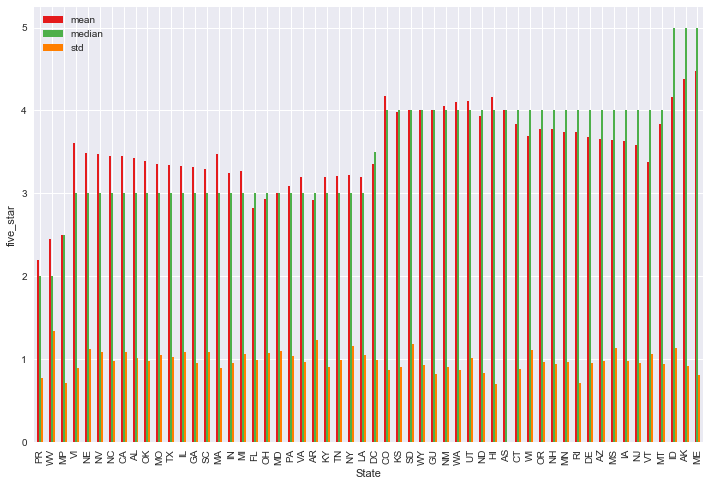

In [13]:
mort_state = total_mortRate.groupby('State',as_index=True)['five_star'].agg(['mean', 'median','std'])
mort_state = mort_state.sort_values(by='mean')
mort_state1 = mort_state.sort_values(by='median')
colors = plt.cm.Set1(np.linspace(0,1,5))
mort_state1.plot.bar(figsize=(12,8),color = colors).set_ylabel('five_star')

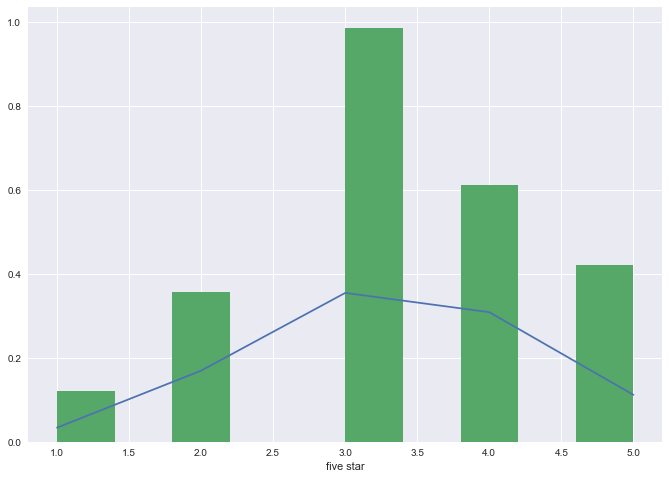

In [14]:
x = total_mortRate[total_mortRate['five_star'].notnull()]
newx = list(x['five_star'])
newx.sort()
xmean = np.mean(newx)
xstd = np.std(newx)
pdf1 = norm.pdf(newx, xmean, xstd)

plt.figure(figsize=(25, 8))
plt.subplot(1,2,1)
plt.plot(newx, pdf1)
plt.hist(newx,normed=True)
plt.xlabel('five star')

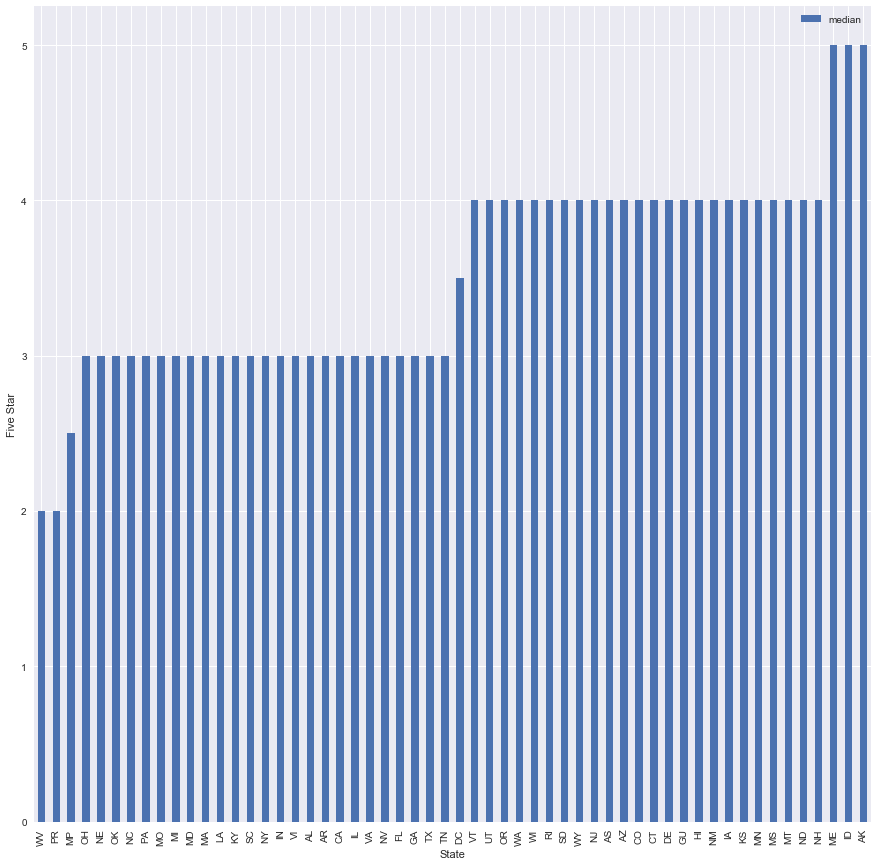

In [15]:
# Exploring the mortality rate against the Five star reviews
# total_mortRate['State']=numeric.fit_transform(total_mortRate['State'].astype('str'))
star = total_mortRate.groupby('State',as_index=True)['five_star'].agg(['median'])
star = star.sort_values(by='median')
colors = plt.cm.viridis(np.linspace(0,1,5))
star.plot.bar(stacked=True, figsize=(15,15)).set_ylabel('Five Star')

C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  
C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if __name__ == '__main__':
C:\Users\benbahtin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if sys.path[0] == '':
C:\Users\benbahtin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
C:\Users\benbahtin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3193: UserWarning: Attempting to set identical b

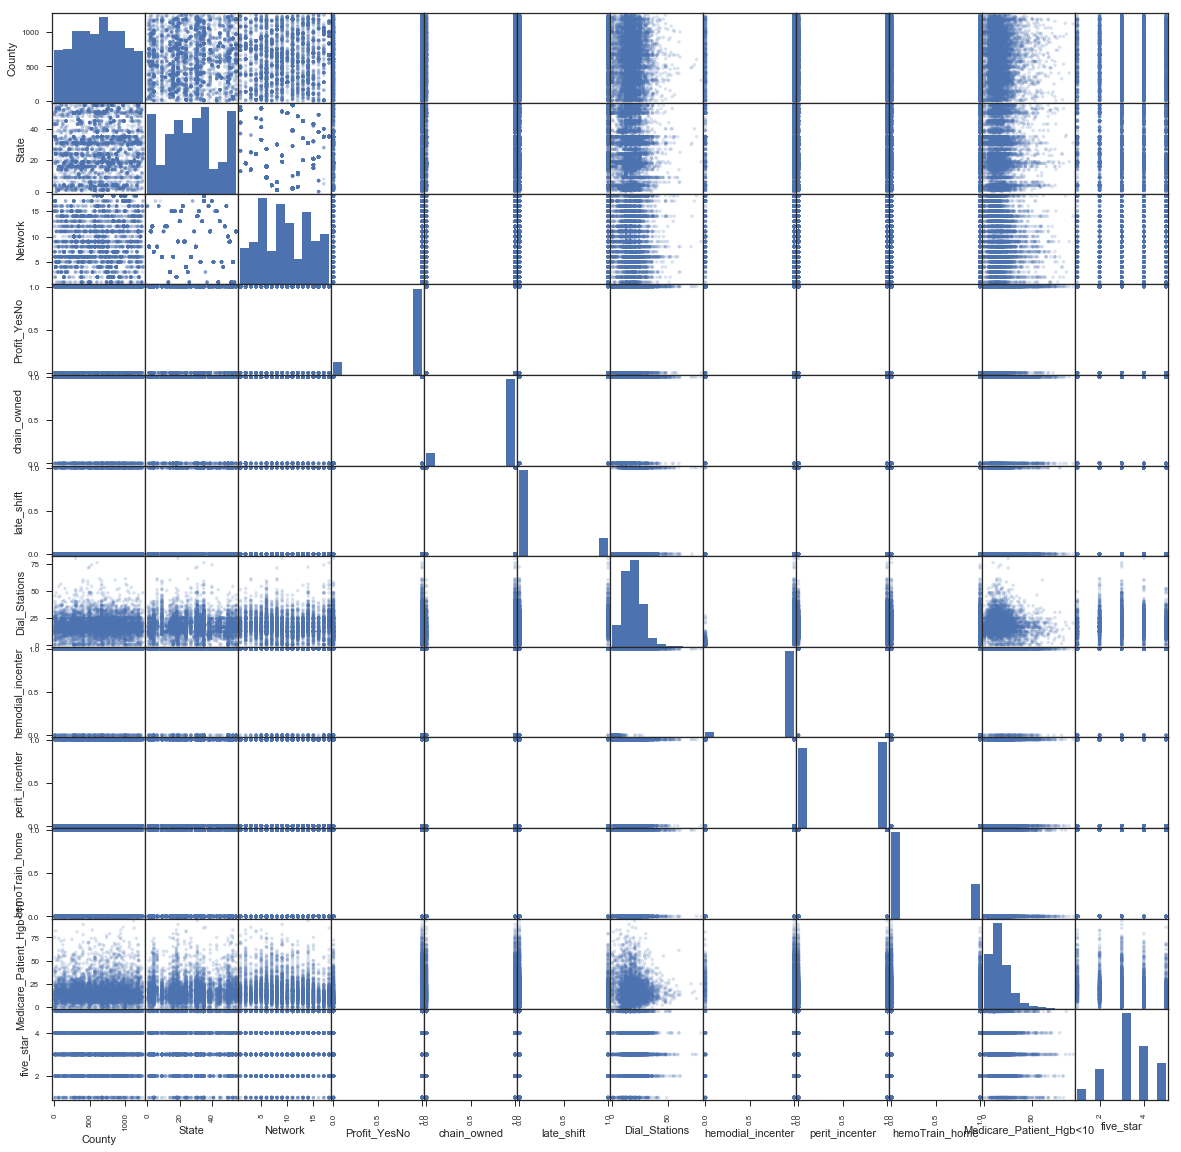

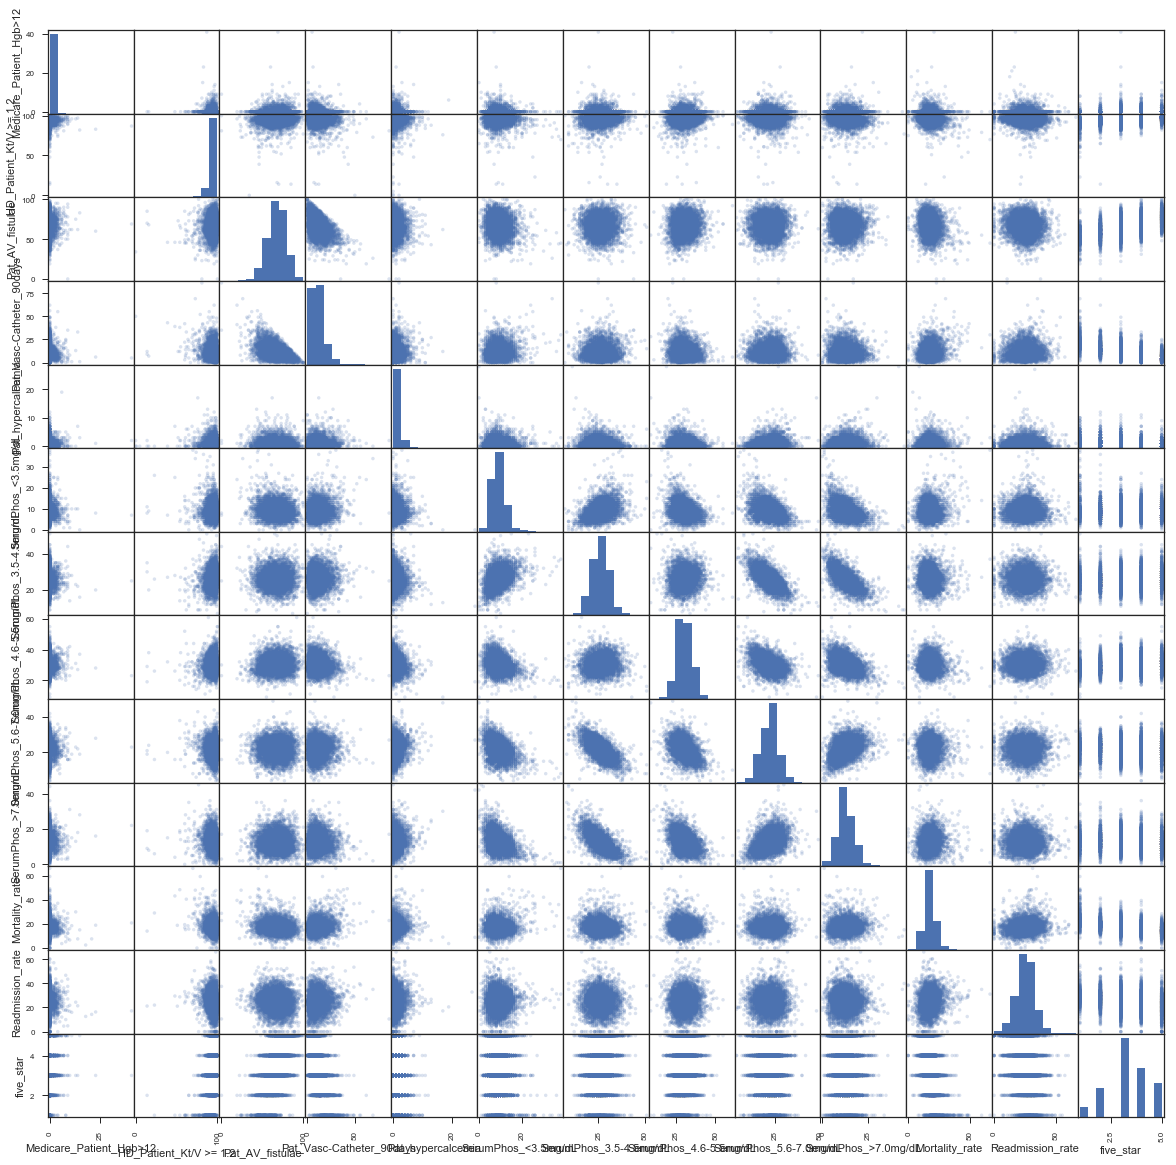

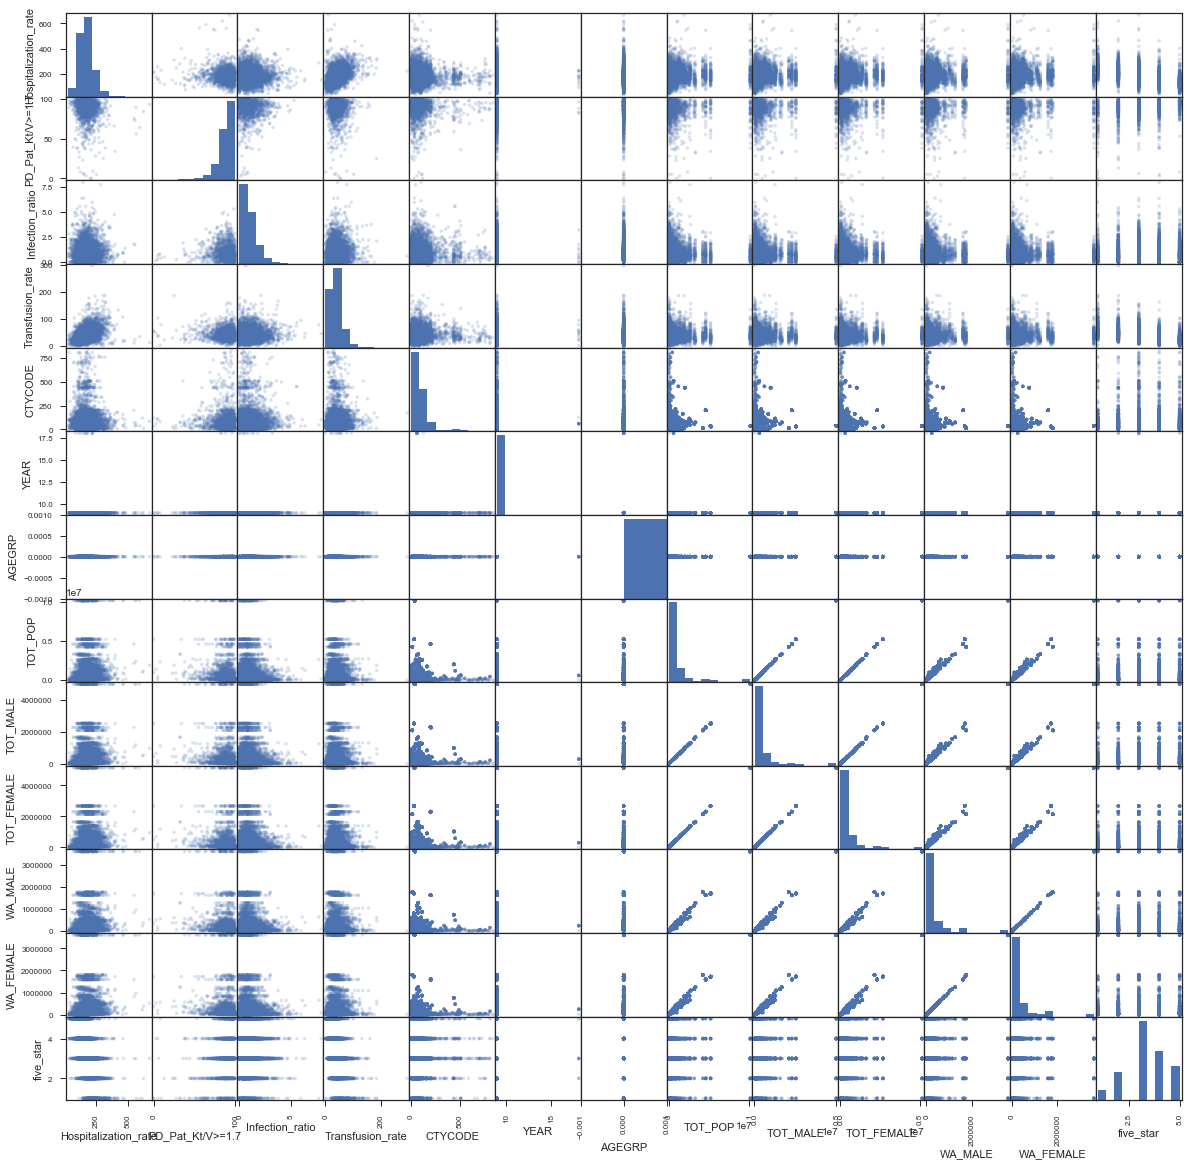

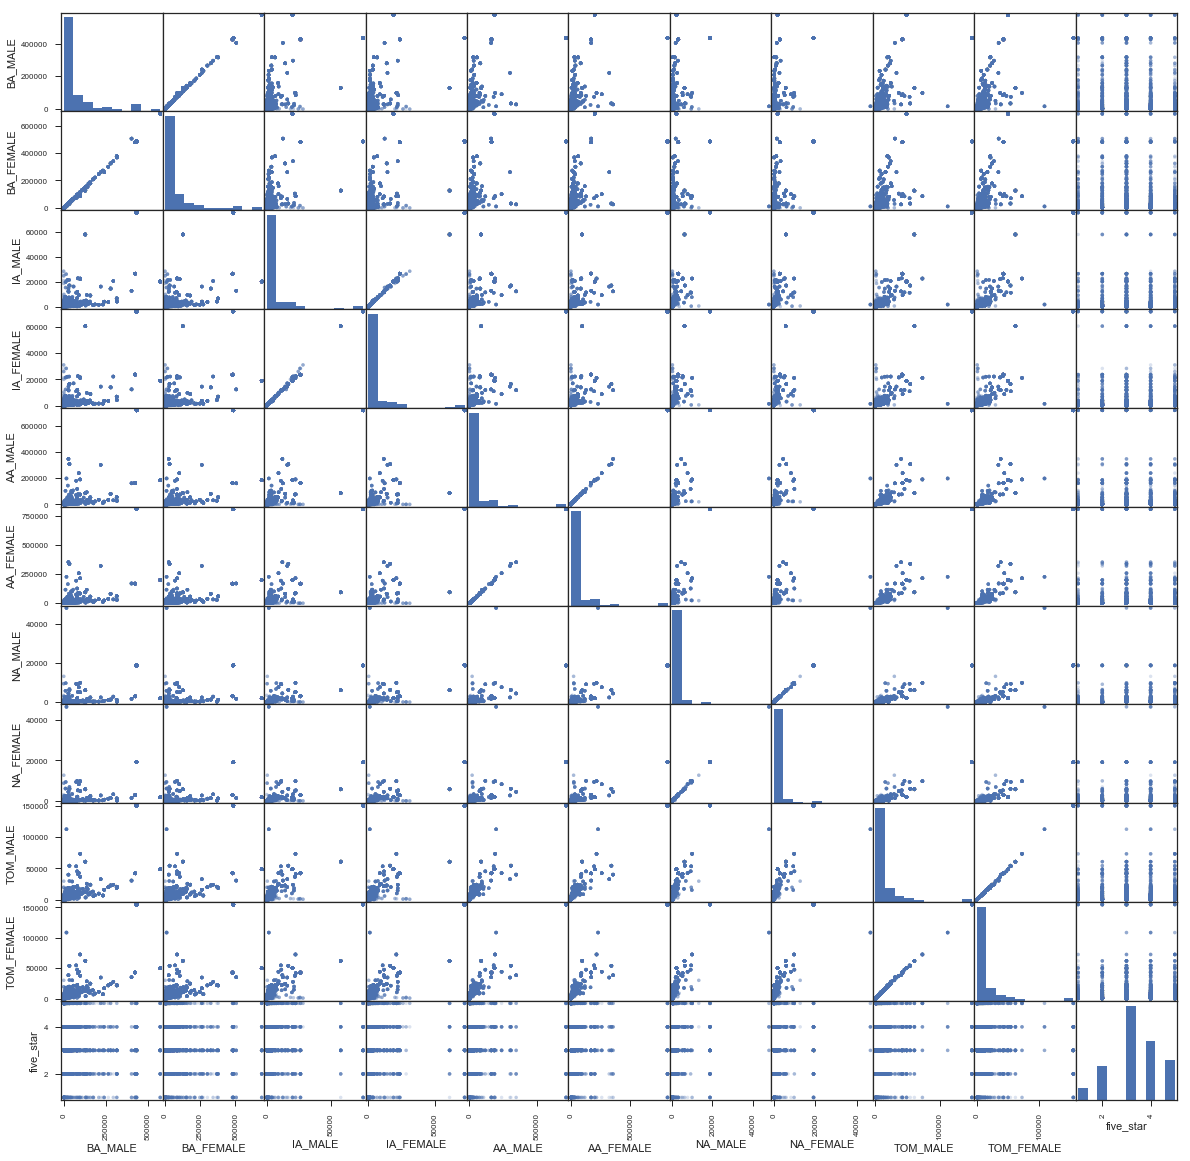

In [30]:
# Comparing the trend of the five star variable to the other features

total_mortRate['State']=numeric.fit_transform(total_mortRate['State'].astype('str'))
list(total_mortRate).index('five_star')


test1 = total_mortRate.iloc[:, np.r_[1:12,46]]
scatter_matrix(test1, alpha=0.2, figsize=(20, 20), diagonal='hist');

test2 = total_mortRate.iloc[:, np.r_[12:24,46]]
scatter_matrix(test2, alpha=0.2, figsize=(20, 20), diagonal='hist');

test3 = total_mortRate.iloc[:, np.r_[24:36,46]]
scatter_matrix(test3, alpha=0.2, figsize=(20, 20), diagonal='hist');

test4 = total_mortRate.iloc[:, np.r_[36:46,46]]
scatter_matrix(test4, alpha=0.2, figsize=(20, 20), diagonal='hist');

# sns.set(style="whitegrid", color_codes=True)
# sns.regplot(x="five_star", y="Hospitalization_rate", data=total_mortRate);

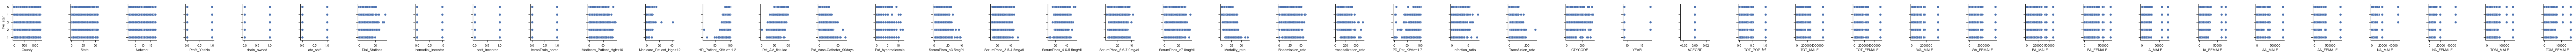

In [29]:
X_col = total_mortRate.columns[1:46]
bins = np.arange(0, 5, 5)

# g = sns.FacetGrid(total_mortRate,col="Medicare_Patient_Hgb>12",row="five_star")
# g.map(plt.hist,'five_star', bins=bins,color='r')


# # g = sns.PairGrid(total_mortRate,x_vars=X_col, y_vars=["five_star"])
sns.set(style="ticks", color_codes=True)

g = sns.pairplot(total_mortRate,y_vars=["five_star"],x_vars=X_col,kind='scatter')
# g = sns.PairGrid(total_mortRate)
# g = g.map(plt.scatter)
g.fig.subplots_adjust(wspace=1, hspace=1)

## Model Fitting

### KMeans clustering

In [18]:
# Loading the necessary libraries
from sklearn.preprocessing import Imputer,StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cross_validation import train_test_split
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

C:\Users\benbahtin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
# Selecting the features

X_col = total_mortRate.columns[1:]
features = total_mortRate[X_col]

# Create our imputer to replace missing values with the median 
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp_feature = imp.fit_transform(features)

# # Converting into data frame
# imp_feature=pd.DataFrame(imp_feature)
# imp_feature.head()

# Standarizing the dataset
X_scaled = pd.DataFrame(StandardScaler().fit_transform(imp_feature))
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.566502,0.473291,-1.414124,0.386982,0.378915,-0.456168,-0.873333,0.241402,-1.037105,1.573615,...,-0.514537,-0.373282,-0.382087,-0.333741,-0.323477,-0.306774,-0.307031,-0.369289,-0.374548,-0.299134
1,-0.392229,1.286450,0.932724,0.386982,0.378915,-0.456168,-0.638759,0.241402,0.964223,-0.635480,...,2.693212,1.489349,1.337477,0.963897,0.867062,0.404349,0.386064,1.085537,1.064129,-0.299134
2,0.155617,-0.152216,0.292675,0.386982,0.378915,-0.456168,0.768687,0.241402,-1.037105,-0.635480,...,-0.211621,-0.337119,-0.318925,-0.245813,-0.245196,-0.301747,-0.303008,-0.145847,-0.145821,-0.299134
3,-0.008141,-0.590071,-0.134025,0.386982,0.378915,-0.456168,-0.638759,0.241402,-1.037105,-0.635480,...,-0.135801,-0.341412,-0.338934,-0.347615,-0.341433,-0.312053,-0.298984,-0.350153,-0.350495,-0.299134
4,0.194324,-1.403229,1.146074,0.386982,0.378915,-0.456168,-1.107907,-4.142463,0.964223,1.573615,...,0.278548,3.771088,4.113626,0.332959,0.319502,1.183844,1.105817,1.791137,1.773735,-0.299134


In [20]:
# Splitting the dataset into two, and later to evaluate the clustering centroids from the two Kmeans clustering results
data_1, data_2= train_test_split(imp_feature, test_size = 0.2, random_state = 1234)

k_range = range(2,11)

for i in k_range:
    model = KMeans(n_clusters=i,random_state=1234)
    pred =model.fit_predict(data_1)
    silhouette_avg = silhouette_score(data_1,pred)
    print('The number of clusters, %d, and silhouette coefficient is %0.2f'% (i,silhouette_avg))

The number of clusters, 2, and silhouette coefficient is 0.85
The number of clusters, 3, and silhouette coefficient is 0.79
The number of clusters, 4, and silhouette coefficient is 0.71
The number of clusters, 5, and silhouette coefficient is 0.65
The number of clusters, 6, and silhouette coefficient is 0.62
The number of clusters, 7, and silhouette coefficient is 0.61
The number of clusters, 8, and silhouette coefficient is 0.62
The number of clusters, 9, and silhouette coefficient is 0.62
The number of clusters, 10, and silhouette coefficient is 0.63


In [21]:
# Using PCA for dimensionality reduction
P= PCA(n_components=6)
dim_redu =P.fit_transform(data_1)

# fit to the kmeans model

km =  KMeans(n_clusters=4)
pred = km.fit_predict(dim_redu)


# adding the PC1 and PC2 to the exsting data frame
data_1 = pd.DataFrame(data_1)
data_1['x']= P.fit_transform(data_1)[:,0]
data_1['y']= P.fit_transform(data_1)[:,1]
data_1['pred_cluster']= pred

# converting cluster into str nature for the plotting purposes
data_1['pred_cluster'] = data_1['pred_cluster'].astype('str')

print(data_1.pred_cluster.value_counts())

1    4212
3     785
0     312
2     139
Name: pred_cluster, dtype: int64


In [22]:
! pip install ggplot

from ggplot import *

C:\Users\benbahtin\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\benbahtin\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\benbahtin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


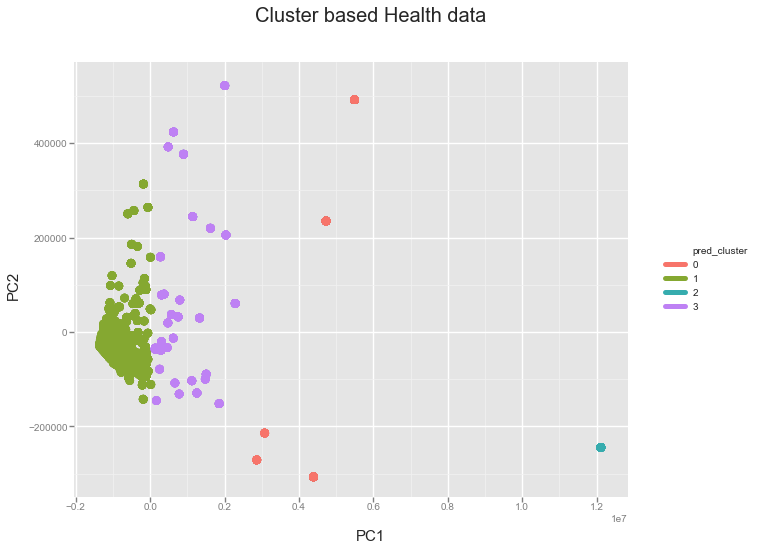

<ggplot: (-9223371994836354037)>

In [23]:
ggplot(data_1,aes('x','y',color='pred_cluster')) + geom_point(size=75) + ggtitle(element_text(text='Cluster based Health data', size=20)) + \
       xlab(element_text(size=15, text='PC1')) + ylab(element_text(size=15, text='PC2')) 